# Final Project for Machine Learning Workshop Fall 2021
Sydney Begerowski, submitted 10/30/2021

## Objective, Data, ML Model
The objective of this project is to predict whether a tumor is maligent or benign. I am using data we've collected in our lab on team performance and cohesion. Team cohesion has been demonstrated to predict team performance in various settings. However, it is unclear if this is the case for extreme teams. This data set includes self-report cohesion measures for 5 extreme teams over mission duration, as well as performance scores on tasks the teams were assigned throughout the mission. Performance is measured as percentage of objectives complete. I will be using a linear regression model with one predictor to attempt to differeniate between high and low performing teams given both the predictor and crtierion are continuous. 

In [10]:
## importing packages
import pandas as pd

In [11]:
url = 'https://raw.githubusercontent.com/sbegerowski/ML_workshop/main/performance%20data.csv'
perf_data = pd.read_csv(url)

In [12]:
perf_data.head()
perf_data.tail()

,team,day,score,cohesion
97,E,33.0,52.38,5.25
98,E,34.0,54.29,5.00
99,E,38.0,62.07,5.50
100,E,41.0,46.43,5.25
101,E,43.0,51.52,5.25


In [13]:
perf_data.info() # types look good
perf_data.isnull().sum() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   team      102 non-null    object 
 1   day       102 non-null    float64
 2   score     102 non-null    float64
 3   cohesion  102 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.3+ KB


team        0
day         0
score       0
cohesion    0
dtype: int64

In [14]:
perf_data.describe()

,day,score,cohesion
count,102.000000,102.000000,102.000000
mean,21.943137,44.513137,5.713235
std,11.041268,26.573212,1.297559
min,3.000000,1.520000,3.000000
25%,14.000000,26.077500,4.625000
50%,21.200000,42.020000,6.250000
75%,31.000000,57.140000,6.750000
max,43.000000,100.000000,7.000000


## Split data

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
X = perf_data.cohesion
y = perf_data.score

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

## Build and test model

In [24]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression().fit(X_train[:,None],y_train)
y_pred = model_linreg.predict(X_test[:,None])

## Evaluate model

In [25]:
metrics.r2_score(y_test,y_pred) # R^2 looks awful 

-0.047634226311086936

In [26]:
metrics.mean_squared_error(y_test,y_pred,squared=False) # MSE high

26.825861157085036

With the model statistics so low, I decided to look at the data visually to see if the issue is the relationship is non-linear or simply does not exist.

Text(0.5, 1.0, 'Team Cohesion Plotted Against Task Performance')

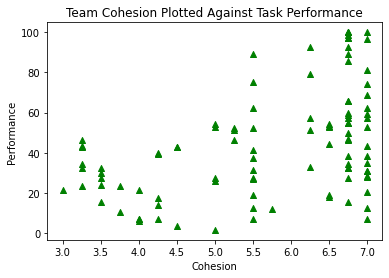

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X, y, c = "green", marker = "^")
plt.xlabel("Cohesion")
plt.ylabel("Performance")
plt.title("Team Cohesion Plotted Against Task Performance")

Text(0.5, 1.0, 'Team Cohesion Plotted Against Task Performance by Teams')

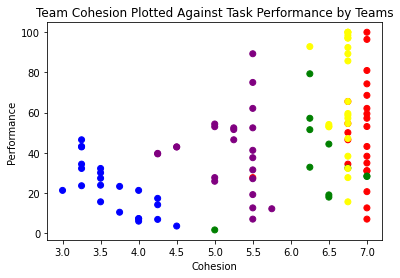

In [36]:
# graphing to look at nesting as well
colors = {'A':'red', 'B':'green', 'C':'blue', 'D':'yellow', 'E':'purple'}

plt.scatter(perf_data['cohesion'], perf_data['score'], c = perf_data['team'].map(colors))
plt.xlabel("Cohesion")
plt.ylabel("Performance")
plt.title("Team Cohesion Plotted Against Task Performance by Teams")

The first plot seems to suggest there is no relationship between performance and cohesion, which is consistent with the model statisics. The second plot reveals there may be some nesting effects at play; however, the relationship between cohesion and performance within teams still seems to be weak. Psychometrics of the cohesion assessment may need to be assessed prior to implementing this measure in future studies, as there seems to be minimal within team variability. This could be contributing to the model's inability to differeniate between high and lowIn sum, this is a poor model and should not be used. 